In [1]:
import numpy as np

class Perceptron(object):
    """ 
    퍼셉트론 분류기
    
    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드
      
    속성
    ------------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습

        매개변수
        -------------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 값

        반환값
        -------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [8]:
import os
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print('URL: ', s)
print('URL: ', url)

URL:  https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data
URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [6]:
df = pd.read_csv(url, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


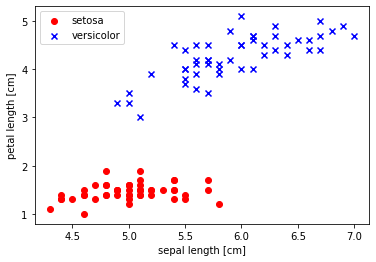

In [9]:
import matplotlib.pyplot as plt

# setosa와 versicolor를 선택
y = df.iloc[0:100, 4].values
y = np.where( y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출
X = df.iloc[0:100, [0, 2]].values

# 산점도
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

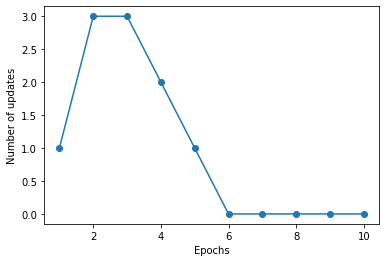

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [28]:
ppn.errors_

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]

In [46]:
ppn.w_

array([-0.38375655, -0.70611756,  1.83471828])

In [30]:
ppn.w_[1:]

array([-0.70611756,  1.83471828])

In [45]:
np.random.RandomState(1).normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])

array([ 0.01624345, -0.00611756, -0.00528172])

In [43]:
np.dot(X, ppn.w_[1:])+ppn.w_[0]

array([-1.41635053, -1.27512702, -1.31737533, -0.87981992, -1.34573877,
       -1.07777031, -1.06329175, -1.16226694, -0.92206823, -1.09165519,
       -1.44471397, -0.8375716 , -1.20451526, -1.40187196, -2.27757648,
       -1.65654924, -1.81165763, -1.41635053, -1.28960558, -1.2328787 ,
       -1.07777031, -1.2328787 , -1.79717906, -0.86593504, -0.28715612,
       -0.97879512, -0.97879512, -1.30349046, -1.48696228, -0.76695985,
       -0.8375716 , -1.44471397, -1.30349046, -1.69879755, -1.09165519,
       -1.71268243, -1.88226938, -1.09165519, -1.10554006, -1.2328787 ,
       -1.5292106 , -1.17615182, -1.10554006, -0.97879512, -0.49899139,
       -1.20451526, -1.04940687, -1.06329175, -1.37410221, -1.34573877,
        3.29659643,  3.35332331,  3.73415185,  3.07146998,  3.46618339,
        3.84760561,  3.79087873,  2.21083772,  3.39557163,  3.09983342,
        2.50716962,  3.15596661,  2.7184112 ,  3.93210224,  2.26697091,
        2.95801622,  3.91821737,  3.04310654,  3.49454683,  2.81

In [50]:
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')

C:\Users\user\AppData\Local\Temp/ipykernel_14988/699898262.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


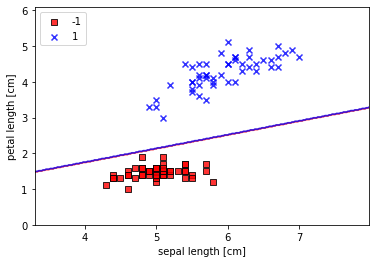

In [18]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [19]:
class AdalineGD(object):
    """
    적응형 선형 뉴런 분류기
    
    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드
      
    속성
    -------------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합
      
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        매개변수
        -----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 값
        
        반환값
        ------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        """선형 활성화 계산"""
        return X
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
            

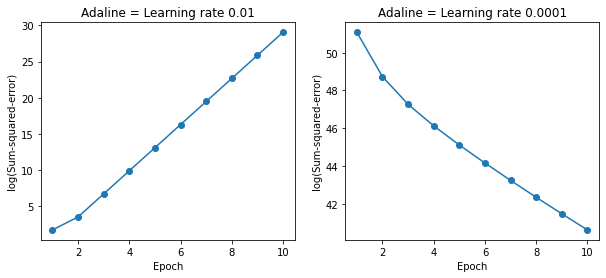

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline = Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline = Learning rate 0.0001')

plt.show()

In [24]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

C:\Users\user\AppData\Local\Temp/ipykernel_14988/699898262.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


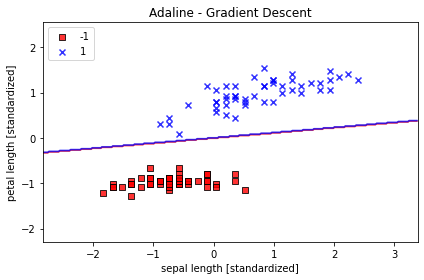

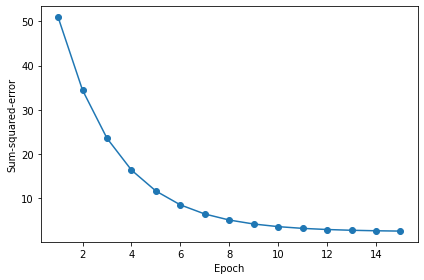

In [25]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

In [53]:
class AdalineSGD(object):
    """
    ADAptive Linear Neuron 분류기
    
    매개변수
    -------------
    learning_rate : float
      학습률 (0.0과 1사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞음.
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드
    
    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합    
    
    """
    
    def __init__(self, learning_rate = 0.01, n_iter = 10,
                 shuffle = True, random_state = None):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        매개변수
        -----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터
          
        반환값
        -----------
        self : object
        
        """
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """
        가중치를 초기화하지 않고 훈련 데이터를 학습
        """
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """
        훈련 데이터를 섞음
        """
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """
        랜덤한 작은 수로 가중치를 초기화
        """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """
        아달린 학습 규칙을 적용하여 가중치를 업데이트
        """
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.learning_rate * xi.dot(error)
        self.w_[0] += self.learning_rate * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """
        최종 입력 계산
        """
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        """
        선형 활성화 계산
        """
        return X
    
    def predict(self, X):
        """
        단위 계단 함수를 사용하여 클래스 레이블을 반환
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

In [54]:
ada = AdalineSGD(n_iter = 15, learning_rate = 0.01, random_state=1)
ada.fit(X_std, y)

C:\Users\user\AppData\Local\Temp/ipykernel_14988/699898262.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


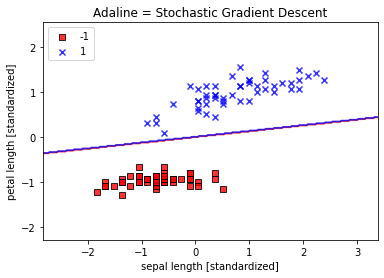

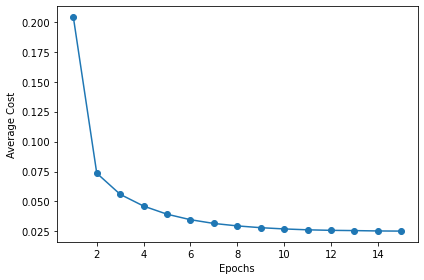

In [55]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline = Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()